<a href="https://colab.research.google.com/github/MiguelGmz7/ML_Practica6/blob/main/Practica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importamos librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Importamos dataset

In [2]:
df=pd.read_csv("Dataset_Facebook.csv",  decimal=',')
df.head(5)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


 # Limpieza de los datos
 Solo necesitamos los datos que sean una foto

In [9]:
df=df[df['Type']=='Photo']
#df = df.dropna('Type')
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279


# Definimos variables para usar

In [16]:
model= LinearRegression()
x=df[["Post Weekday","Post Hour"]]
x=df[["Post Weekday", "Post Hour"]].values.reshape((-1,2))

print(x)
y=df["like"].values.reshape(-1,1)
print(y)

[[ 4  3]
 [ 3  3]
 [ 2 10]
 [ 2  3]
 [ 1  3]
 [ 7  9]
 [ 6 10]
 [ 5 10]
 [ 5 10]
 [ 5  3]
 [ 4  5]
 [ 3  3]
 [ 2 12]
 [ 1 11]
 [ 1  3]
 [ 7 10]
 [ 7  3]
 [ 5  3]
 [ 5  3]
 [ 4  2]
 [ 3 10]
 [ 3  3]
 [ 2  9]
 [ 2  3]
 [ 1 11]
 [ 1  3]
 [ 7 10]
 [ 7  3]
 [ 5 10]
 [ 4 11]
 [ 2 11]
 [ 1  9]
 [ 1  3]
 [ 7  9]
 [ 7  3]
 [ 6 10]
 [ 5 11]
 [ 5  3]
 [ 4 10]
 [ 4  3]
 [ 3 11]
 [ 3  2]
 [ 2 10]
 [ 2  3]
 [ 1 10]
 [ 1  3]
 [ 7 11]
 [ 7  3]
 [ 6 11]
 [ 6  3]
 [ 5 10]
 [ 4  2]
 [ 3  2]
 [ 3  2]
 [ 1 10]
 [ 1  3]
 [ 7 12]
 [ 6 10]
 [ 6  3]
 [ 5 10]
 [ 4  9]
 [ 3 10]
 [ 3  3]
 [ 2 11]
 [ 2  3]
 [ 1  9]
 [ 1  3]
 [ 7  9]
 [ 7  4]
 [ 6 10]
 [ 6  3]
 [ 5 11]
 [ 4 10]
 [ 4  9]
 [ 4  3]
 [ 3 10]
 [ 3  4]
 [ 2 11]
 [ 2  4]
 [ 1 11]
 [ 7  9]
 [ 6 10]
 [ 6  4]
 [ 1  3]
 [ 7 13]
 [ 7 12]
 [ 7 12]
 [ 7 11]
 [ 7 10]
 [ 7 10]
 [ 7  8]
 [ 7  7]
 [ 7  5]
 [ 7  3]
 [ 6 13]
 [ 6 13]
 [ 6 12]
 [ 6 11]
 [ 6  9]
 [ 6  9]
 [ 6  8]
 [ 6  6]
 [ 6  2]
 [ 5  8]
 [ 4 10]
 [ 2 10]
 [ 2  3]
 [ 1 10]
 [ 1  3]
 [ 7 10]
 [ 6  4]
 

# Entrenamos el modelo

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)

model.fit(x_train, y_train)

y_pred= model.predict(x_test)
print(y_pred[0:10])

[[204.5634153 ]
 [205.99828422]
 [170.87364369]
 [197.96894787]
 [172.30851262]
 [177.46811112]
 [178.90298004]
 [213.31018612]
 [190.65704597]
 [173.81216017]]


# Imprimimos el error

In [11]:
mse=mean_squared_error(y_test, y_pred)
print(mse)

88401.2793848564


# Con sus coeficientes

In [13]:
print(f'Coeficiente mx1: {model.coef_[0][0]}')
print(f'Coeficiente mx1: {model.coef_[0][1]}')
print(f'Intercepto b: {model.intercept_[0]}')

Coeficiente mx1: -10.250418375547804
Coeficiente mx1: -3.655950946594023
Intercepto b: 251.37334313718503


# Generamos diagrama

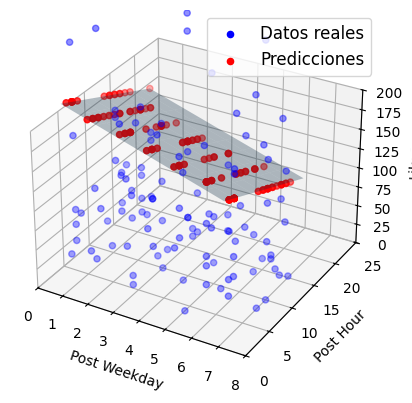

In [14]:
fig=plt.figure()
plt.rcParams['figure.figsize']=(8,8)
ax=fig.add_subplot(111, projection='3d')
ax.scatter(x_test[:,0],x_test[:,1], y_test[:,0], color='blue', label='Datos reales')
ax.scatter(x_test[:,0],x_test[:,1], y_pred[:,0], color='red', label='Predicciones')

ax.set_xlim([0,8])
ax.set_ylim([0,25])
ax.set_zlim([0,200])


xaux=np.linspace(x_test[:,0].min(),x_test[:,0].max(), num=10)
yaux=np.linspace(x_test[:,1].min(),x_test[:,1].max(), num=10)
xaux, yaux=np.meshgrid(xaux, yaux)

z=model.intercept_+model.coef_[0][0]*xaux+model.coef_[0][1]*yaux

ax.plot_surface(xaux, yaux, z, alpha=0.3)
ax.set_xlabel('Post Weekday')
ax.set_ylabel('Post Hour')
ax.set_zlabel('Likes')
ax.legend(fontsize=12, loc='upper right')
plt.show()